# Load Libraries

In [1]:
import pandas as pd
import os
from datasets import load_from_disk
import pprint
from transformers import AutoTokenizer
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
from eda_functions import (
    transform_df, 
    plot_token_length_hist, 
    plot_answer_position_rate_hist, 
    plot_answer_inclusion_hist
)

# Load Datasets

In [2]:
BASE_DIR = os.getcwd()
TOTAL_PATH = os.path.join(BASE_DIR, '../data/train_dataset')
TEST_PATH = os.path.join(BASE_DIR, '../data/test_dataset')

In [3]:
total_dict = load_from_disk(TOTAL_PATH)
print(total_dict)
print(type(total_dict))

DatasetDict({
    train: Dataset({
        features: ['title', 'context', 'question', 'id', 'answers', 'document_id', '__index_level_0__'],
        num_rows: 3952
    })
    validation: Dataset({
        features: ['title', 'context', 'question', 'id', 'answers', 'document_id', '__index_level_0__'],
        num_rows: 240
    })
})
<class 'datasets.dataset_dict.DatasetDict'>


In [4]:
train_df = pd.DataFrame.from_dict(total_dict['train'])
valid_df = pd.DataFrame.from_dict(total_dict['validation'])

In [5]:
train_df.head(10)

,title,context,question,id,answers,document_id,__index_level_0__
0,미국 상원,미국 상의원 또는 미국 상원(United States Senate)은 양원제인 미국...,대통령을 포함한 미국의 행정부 견제권을 갖는 국가 기관은?,mrc-1-000067,"{'answer_start': [235], 'text': ['하원']}",18293,42
1,인사조직관리,'근대적 경영학' 또는 '고전적 경영학'에서 현대적 경영학으로 전환되는 시기는 19...,현대적 인사조직관리의 시발점이 된 책은?,mrc-0-004397,"{'answer_start': [212], 'text': ['《경영의 실제》']}",51638,2873
2,강희제,강희제는 강화된 황권으로 거의 황제 중심의 독단적으로 나라를 이끌어 갔기에 자칫 전...,강희제가 1717년에 쓴 글은 누구를 위해 쓰여졌는가?,mrc-1-000362,"{'answer_start': [510], 'text': ['백성']}",5028,230
3,금동삼존불감,"불상을 모시기 위해 나무나 돌, 쇠 등을 깎아 일반적인 건축물보다 작은 규모로 만든...",11~12세기에 제작된 본존불은 보통 어떤 나라의 특징이 전파되었나요?,mrc-0-001510,"{'answer_start': [625], 'text': ['중국']}",34146,992
4,계사명 사리구,동아대학교박물관에서 소장하고 있는 계사명 사리구는 총 4개의 용기로 구성된 조선후기...,명문이 적힌 유물을 구성하는 그릇의 총 개수는?,mrc-0-000823,"{'answer_start': [30], 'text': ['4개']}",47334,548
5,용아병,델포이의 신탁에 따라 암소를 따라간 카드모스는 테베 땅에 이르렀다. 카드모스는 암소...,카드모스의 부하들이 간 곳에는 무엇이 있었는가?,mrc-0-005265,"{'answer_start': [91], 'text': ['드래곤']}",37482,3429
6,호반,"제27회와 제73회에 출현한다. 관우는 자신을 저지하는 공수, 맹탄, 한복, 변희를...",관우를 불태워 죽이려한 사람 누구인가?,mrc-0-000532,"{'answer_start': [68], 'text': ['형양태수 왕식']}",24395,360
7,제50노섬브리안 보병사단,이집트로 이어지는 해안 도로는 1개의 사단만이 방어할 수 있었으며 엘 아뎀 요새와 ...,참호 속에 무기와 장비를 버리고 도주한 집단은?,mrc-0-002965,"{'answer_start': [583], 'text': ['이탈리아군']}",43399,1953
8,오싱,하지만 슬픈 일들이 그녀의 행복을 질시하고 있었다.\n평생 고생만 한 어머니를 백혈...,제2차 세계 대전에 참전하여 사망한 자식은?,mrc-0-000977,"{'answer_start': [195], 'text': ['큰아들 유']}",10426,645
9,모후산,모후산(母后山)대한민국 전라남도 화순군과 순천시의 경계를 이루는 높이 943.7m의...,고려 공민왕이 처가 식구들과 아내와 함께 피신처로 삼은 마을은?,mrc-0-003839,"{'answer_start': [861], 'text': ['왕대마을']}",15766,2518


In [6]:
valid_df.head(10)

,title,context,question,id,answers,document_id,__index_level_0__
0,전효숙,"순천여자고등학교 졸업, 1973년 이화여자대학교를 졸업하고 1975년 제17회 사법...",처음으로 부실 경영인에 대한 보상 선고를 받은 회사는?,mrc-0-003264,"{'answer_start': [284], 'text': ['한보철강']}",9027,2146
1,스토우빌선,요크 카운티 동쪽에 처음으로 여객 열차 운행이 시작한 시점은 1868년 토론토 & ...,스카버러 남쪽과 코보콘그 마을의 철도 노선이 처음 연장된 연도는?,mrc-0-004762,"{'answer_start': [146], 'text': ['1871년']}",51765,3106
2,촐라,"촐라 정부\n 촐라의 정부 체제는 전제군주제였으며,2001 촐라의 군주는 절대적인 ...",촌락에서 운영 위원 후보자 이름을 쓰기위해 사용된 것은?,mrc-1-001810,"{'answer_start': [517], 'text': ['나뭇잎']}",15694,1180
3,백조 기사,프랑스의 십자군 무훈시는 1099년 예루살렘 왕국의 통치자가 된 고드프루아 드 부용...,로타이르가 백조를 구하기 위해 사용한 것은?,mrc-1-000219,"{'answer_start': [1109], 'text': ['금대야']}",59536,141
4,탈관료제화,탈관료제화는 현대사회에서 관료제 성격이 약화되는 현상이다. 현대사회에서 관료제는 약...,의견을 자유롭게 나누는 것은 조직 내 어떤 관계에서 가능한가?,mrc-1-000285,"{'answer_start': [386], 'text': ['수평적 관계']}",32991,184
5,마쓰에 소요 사건,마쓰에 소요 사건(마쓰에소조지켄)은 1945년 8월 24일 일본 제국 시마네현의 현...,1945년 쇼와천황의 항복 선언이 발표된 라디오 방송은?,mrc-0-005106,"{'answer_start': [408], 'text': ['옥음방송']}",27139,3322
6,자수장,"수를 놓을 때에 사용하는 기법을 문양의 형태에 따라 나누어 보면 선을 잇는 수, 면...",징금수는 서양 자수의 어떤 기법과 같은 기술을 사용하는가?,mrc-0-002076,"{'answer_start': [192], 'text': ['코칭 스티치']}",19975,1366
7,감염내과,감염내과 전문의들은 일반적으로 다른 진료과의 의사들에게 복잡한 감염병에 대한 고문 ...,다른 과 의사들은 감염내과 전문의들로부터 어떤 것에 대해 조언을 받는가?,mrc-1-000414,"{'answer_start': [31], 'text': ['복잡한 감염병']}",58032,268
8,노트르담 다리,예부터 노트르담 다리는 큰 다리(Grand-pont)라고 불리면서 센 강을 가로지르...,루이 14세의 왕비 마리아 테래사는 어느 나라 공주인가?,mrc-0-002875,"{'answer_start': [625], 'text': ['스페인']}",13804,1890
9,히자즈,여러 유적이 로마 제국의 영역상 헤자즈 일대에 미쳤음을 증명하고 있다. 이집트와 오...,헤자즈 왕국이 실존했던 것은 언제까지인가?,mrc-0-003828,"{'answer_start': [71], 'text': ['20세기 초']}",19942,2510


In [7]:
dict(train_df.iloc[0])

{'title': '미국 상원',
 'context': '미국 상의원 또는 미국 상원(United States Senate)은 양원제인 미국 의회의 상원이다.\\n\\n미국 부통령이 상원의장이 된다. 각 주당 2명의 상원의원이 선출되어 100명의 상원의원으로 구성되어 있다. 임기는 6년이며, 2년마다 50개주 중 1/3씩 상원의원을 새로 선출하여 연방에 보낸다.\\n\\n미국 상원은 미국 하원과는 다르게 미국 대통령을 수반으로 하는 미국 연방 행정부에 각종 동의를 하는 기관이다. 하원이 세금과 경제에 대한 권한, 대통령을 포함한 대다수의 공무원을 파면할 권한을 갖고 있는 국민을 대표하는 기관인 반면 상원은 미국의 주를 대표한다. 즉 캘리포니아주, 일리노이주 같이 주 정부와 주 의회를 대표하는 기관이다. 그로 인하여 군대의 파병, 관료의 임명에 대한 동의, 외국 조약에 대한 승인 등 신속을 요하는 권한은 모두 상원에게만 있다. 그리고 하원에 대한 견제 역할(하원의 법안을 거부할 권한 등)을 담당한다. 2년의 임기로 인하여 급진적일 수밖에 없는 하원은 지나치게 급진적인 법안을 만들기 쉽다. 대표적인 예로 건강보험 개혁 당시 하원이 미국 연방 행정부에게 퍼블릭 옵션(공공건강보험기관)의 조항이 있는 반면 상원의 경우 하원안이 지나치게 세금이 많이 든다는 이유로 퍼블릭 옵션 조항을 제외하고 비영리건강보험기관이나 보험회사가 담당하도록 한 것이다. 이 경우처럼 상원은 하원이나 내각책임제가 빠지기 쉬운 국가들의 국회처럼 걸핏하면 발생하는 의회의 비정상적인 사태를 방지하는 기관이다. 상원은 급박한 처리사항의 경우가 아니면 법안을 먼저 내는 경우가 드물고 하원이 만든 법안을 수정하여 다시 하원에 되돌려보낸다. 이러한 방식으로 단원제가 빠지기 쉬운 함정을 미리 방지하는 것이다.날짜=2017-02-05',
 'question': '대통령을 포함한 미국의 행정부 견제권을 갖는 국가 기관은?',
 'id': 'mrc-1-000067',
 'answers': {'answer_start'

In [8]:
test_dict = load_from_disk(TEST_PATH)
print(test_dict)
print(type(test_dict))

DatasetDict({
    validation: Dataset({
        features: ['question', 'id'],
        num_rows: 600
    })
})
<class 'datasets.dataset_dict.DatasetDict'>


In [9]:
test_df = pd.DataFrame.from_dict(test_dict['validation'])

In [10]:
test_df.head(10)

,question,id
0,유령'은 어느 행성에서 지구로 왔는가?,mrc-1-000653
1,용병회사의 경기가 좋아진 것은 무엇이 끝난 이후부터인가?,mrc-1-001113
2,돌푸스에게 불특정 기간동안 하원이 잠시 쉬는 것을 건의 받았던 인물은?,mrc-0-002191
3,"마오리언어와 영어, 뉴질랜드 수화를 공식 언어로 사용하는 나라는?",mrc-0-003951
4,디엔비엔푸 전투에서 보응우옌잡이 상대한 국가는?,mrc-1-001272
5,단공류가 일반 포유류와 다르다는 것을 알 수 있는 신체 부위는?,mrc-1-000993
6,상류 부르주아의 정치 독점을 불러일으킨 체계는?,mrc-0-005021
7,아시노 호가 만들어진 원인은 무엇인가?,mrc-1-000163
8,흉년이 발생하고 곳곳에 난이 일어났던 시기는?,mrc-0-001283
9,급전궤도는 보통 무엇으로 만들어져 있는가?,mrc-0-004543


### Define Function: `transform_df`

In [ ]:
def transform_df(df, save_csv=False):
    answers = df.answers
    answer_starts = pd.DataFrame([answer['answer_start'][0] for answer in answers])
    answer_starts.columns =['answer_start']
    answer_text = pd.DataFrame([answer['text'][0] for answer in answers])
    answer_text.columns = ['answer_text']
    
    df_modified = df.drop(['answers', '__index_level_0__'], axis=1)
    df_modified = pd.concat([df_modified, answer_starts, answer_text], axis=1)
    df_modified = df_modified[['id', 'title', 'question', 'answer_start', 'answer_text', 'context', 'document_id']]
    df_modified = df_modified.sort_values('id')
    
    if save_csv:
        df_modified.to_csv('../data/train_csv_version.csv', index=False)
    
    return df_modified

In [ ]:
train_df_modified = transform_df(train_df, save_csv=False)
train_df_modified

In [ ]:
valid_df_modified = transform_df(valid_df, save_csv=False)
valid_df_modified

# Token Lengths

## Train, Valid Datasets: Contexts & Questions

- Train과 valid 데이터셋 내 context와 question text의 token sequence length 조사
- `AutoTokenizer.from_pretrained('klue/bert-base')` 사용

### Define Function: `plot_token_length_hist`

### Contexts Token Lengths

In [32]:
def plot_token_length_hist(texts, feature_name='context', data_name='train', bins=15):
    tokenizer = AutoTokenizer.from_pretrained('klue/bert-base')
    token_lengths = []
    # 텍스트를 토큰화하여 토큰의 길이를 계산
    for text in tqdm(texts):
        token_length = len(tokenizer.tokenize(text))
        token_lengths.append(token_length)

    # 히스토그램으로 토큰의 길이 분포 시각화
    plt.figure(figsize=(13, 7))
    n, bins, patches = plt.hist(token_lengths, bins=bins)
    plt.xlabel('Token Length')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {feature_name.title()} ({data_name.title()}) Token Lengths')
    
    for i, (rate, count) in enumerate(zip(bins, n)):
        plt.text(rate + (bins[i+1] - bins[i]) / 2, count, str(int(count)), color='black', ha='center', va='bottom')
    
    plt.show()
    
    print("Max Token Length:", max(token_lengths))
    print("Average Token Length:", sum(token_lengths)/len(token_lengths))
    print("Min Token Length:", min(token_lengths))

100%|██████████| 3952/3952 [00:04<00:00, 829.58it/s]


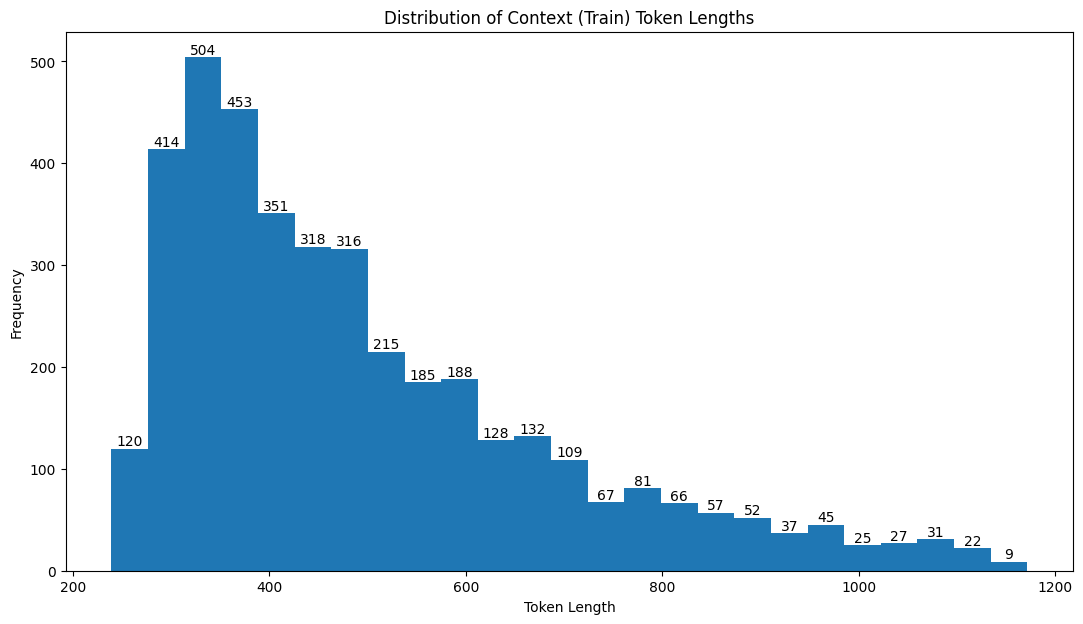

Max Token Length: 1172
Average Token Length: 495.30161943319837
Min Token Length: 239


In [37]:
# 분석할 텍스트
train_contexts = train_df.context
plot_token_length_hist(train_contexts, feature_name='context', data_name='train', bins=25)

100%|██████████| 240/240 [00:00<00:00, 831.57it/s]


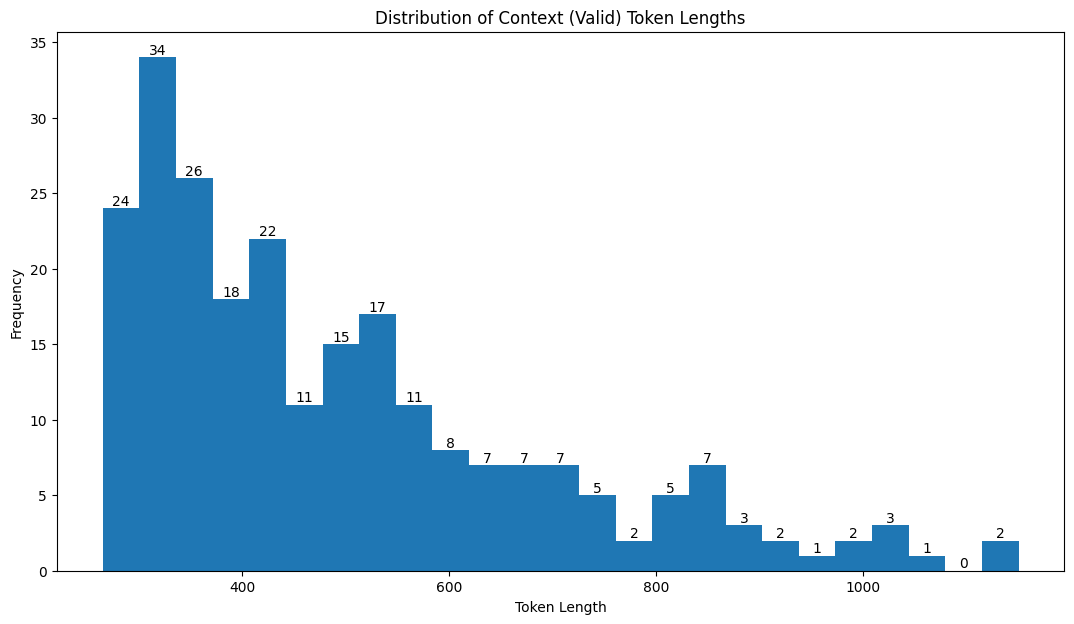

Max Token Length: 1151
Average Token Length: 494.3041666666667
Min Token Length: 265


In [36]:
# 분석할 텍스트
valid_contexts = valid_df.context
plot_token_length_hist(valid_contexts, feature_name='context', data_name='valid', bins=25)

### Questions Token Lengths

100%|██████████| 3952/3952 [00:00<00:00, 10877.47it/s]


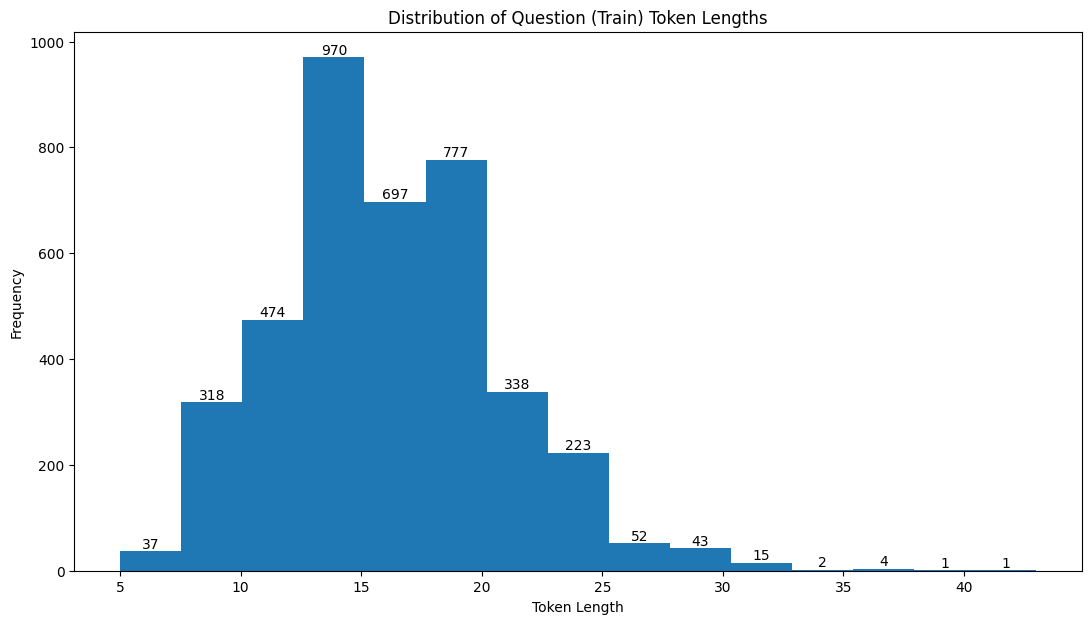

Max Token Length: 43
Average Token Length: 16.29832995951417
Min Token Length: 5


In [25]:
# 분석할 텍스트
train_questions = train_df.question
plot_token_length_hist(train_questions, feature_name='question', data_name='train', bins=15)

100%|██████████| 240/240 [00:00<00:00, 10146.59it/s]


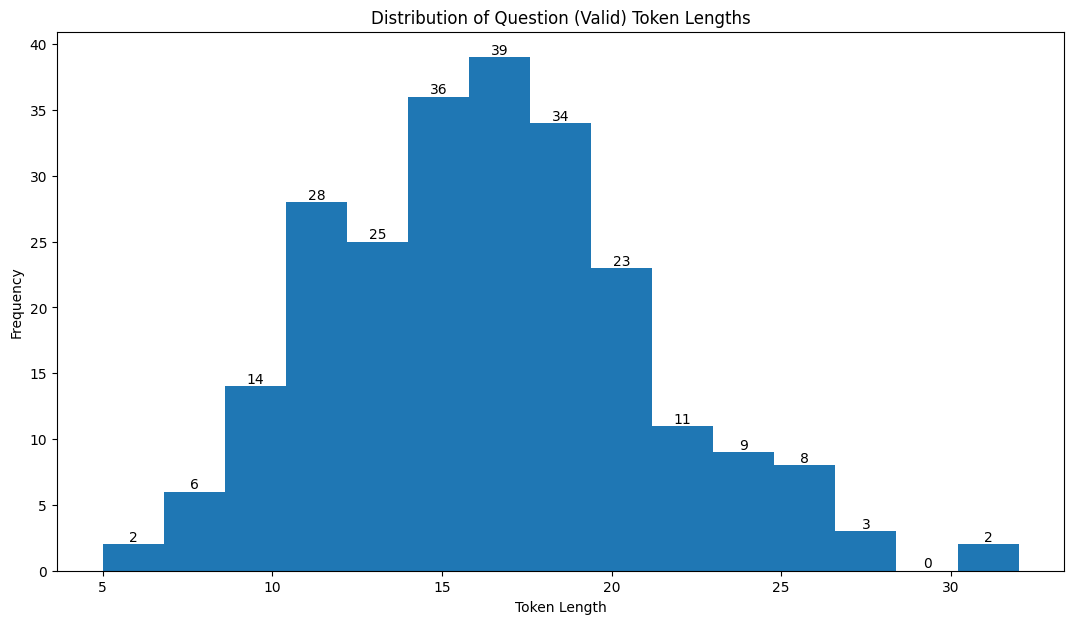

Max Token Length: 32
Average Token Length: 16.316666666666666
Min Token Length: 5


In [17]:
# 분석할 텍스트
valid_questions = valid_df.question
plot_token_length_hist(valid_questions, feature_name='question', data_name='valid', bins=15)

### Answer Text Token Lengths

100%|██████████| 3952/3952 [00:00<00:00, 18974.04it/s]


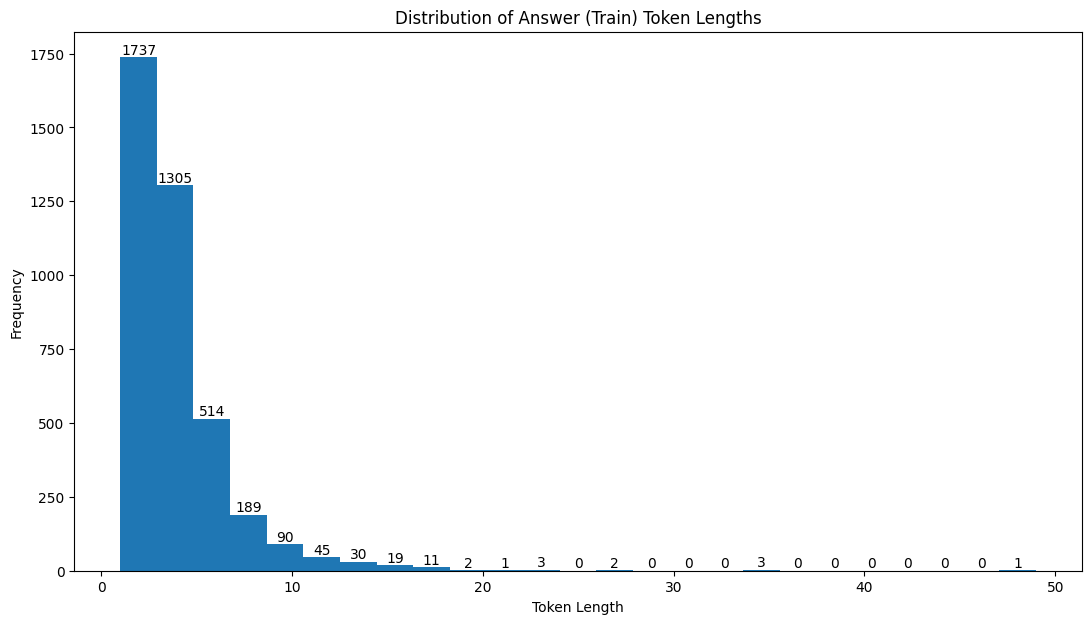

Max Token Length: 49
Average Token Length: 3.5212550607287447
Min Token Length: 1


In [33]:
train_answer_texts = transform_df(train_df).answer_text
plot_token_length_hist(train_answer_texts, feature_name='answer', data_name='train', bins=25)

100%|██████████| 240/240 [00:00<00:00, 17424.84it/s]


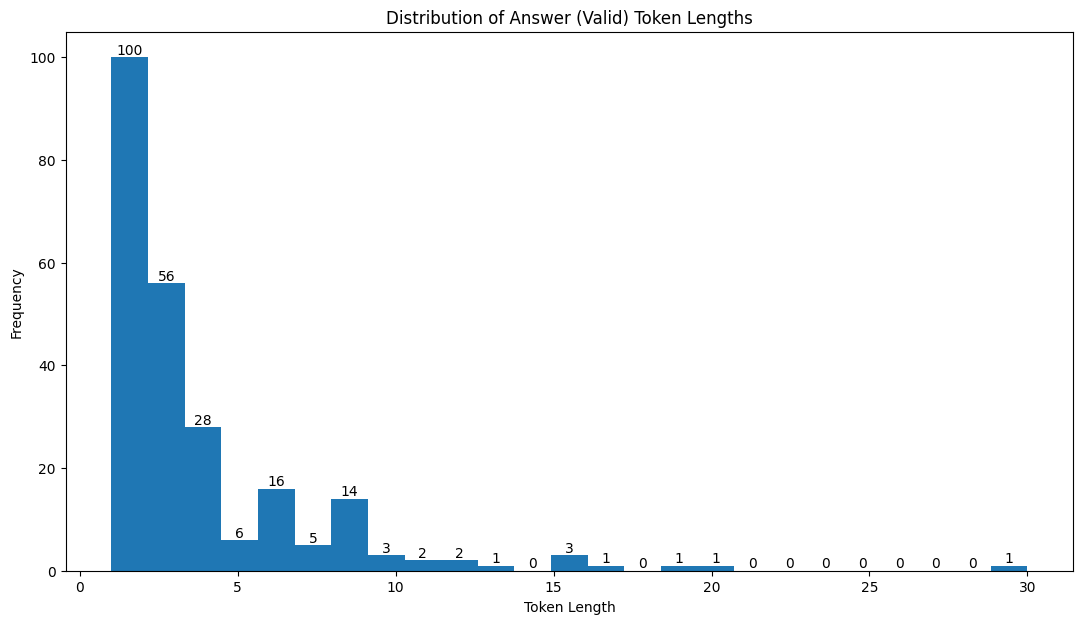

Max Token Length: 30
Average Token Length: 3.8666666666666667
Min Token Length: 1


In [35]:
valid_answer_texts = transform_df(valid_df).answer_text
plot_token_length_hist(valid_answer_texts, feature_name='answer', data_name='valid', bins=25)

## Test Datasets: Questions

- Test 데이터셋 내에는 context text가 존재하지 않으므로, question text의 token sequence length만 조사

100%|██████████| 600/600 [00:00<00:00, 10538.45it/s]


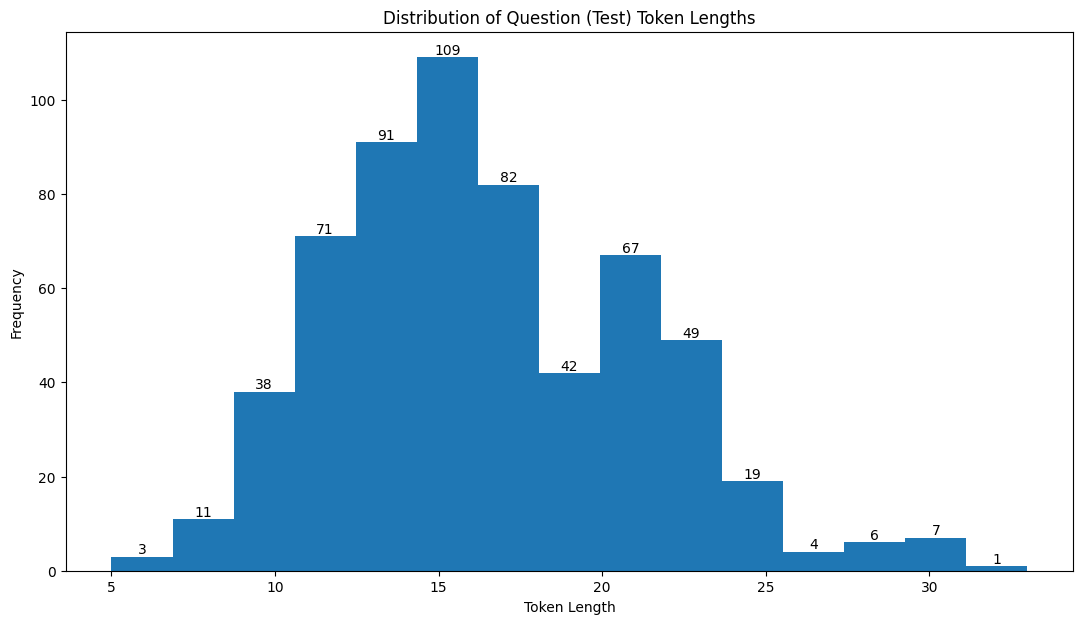

Max Token Length: 33
Average Token Length: 16.49
Min Token Length: 5


In [38]:
# 분석할 텍스트
test_questions = test_df.question
plot_token_length_hist(test_questions, feature_name='question', data_name='test', bins=15)

# Answer (Start) Position Rate

- 전체 문장 길이 중 answer 단어의 start index 위치는 어떤 비율(i.e., 초/중/종반)에 존재하는가
- Tokenizer 대신 글자 단위 길이로 계산

### Define Function: `plot_answer_position_rate_hist`

In [120]:
def plot_answer_position_rate_hist(df, data_name='train', bins=20):
    contexts = df.context
    answers_dicts = df.answers
    
    answer_position_rates = []
    for context, answer_dict in zip(tqdm(contexts), answers_dicts):
        answer_start = answer_dict['answer_start'][0]
        
        answer_position_rates.append(answer_start / len(list(context)))
        
    # 히스토그램으로 정답 위치 분포 시각화
    plt.figure(figsize=(13, 7))
    n, bins, patches = plt.hist(answer_position_rates, bins=bins)
    plt.xlabel('Answer Position Rates')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {data_name.title()} Answer Position Rates')
    
    # 데이터 숫자와 x축 눈금 설정
    for i, (rate, count) in enumerate(zip(bins, n)):
        plt.text(rate + (bins[i+1] - bins[i]) / 2, count, str(int(count)), color='black', ha='center', va='bottom')
    
    plt.show()
    
    print("Max Position Rate: {:.4f}".format(max(answer_position_rates)))
    print("Average Position Rate: {:.4f}".format(sum(answer_position_rates)/len(answer_position_rates)))
    print("Min Position Rate: {:.4f}".format(min(answer_position_rates)))

100%|██████████| 3952/3952 [00:00<00:00, 31154.23it/s]


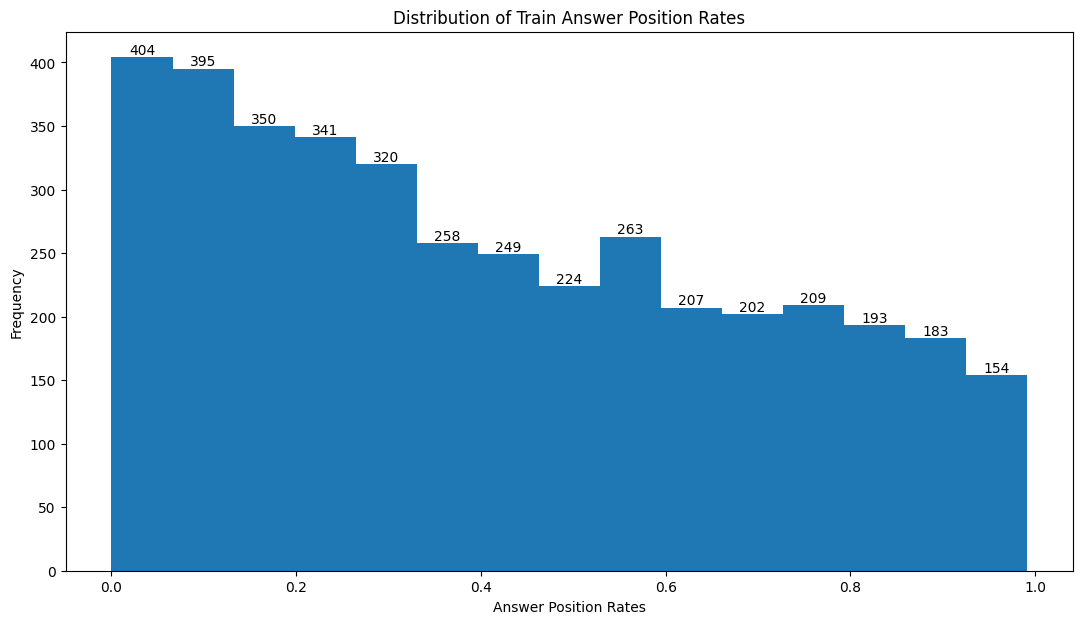

Max Position Rate: 0.9916
Average Position Rate: 0.4149
Min Position Rate: 0.0000


In [121]:
plot_answer_position_rate_hist(train_df, data_name='train', bins=15)

100%|██████████| 240/240 [00:00<00:00, 29652.20it/s]


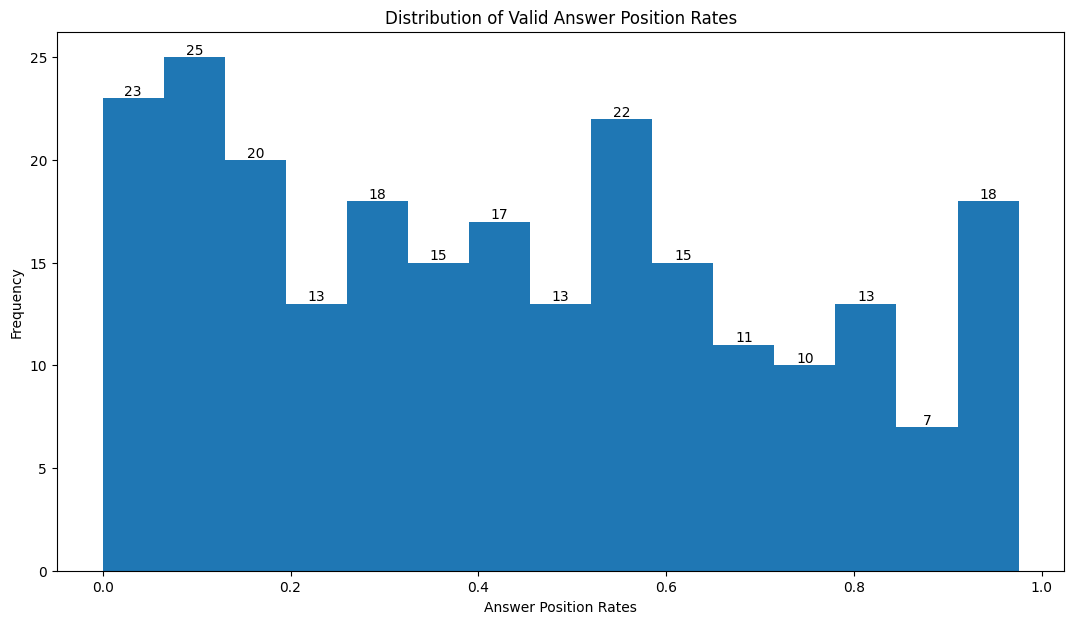

Max Position Rate: 0.9752
Average Position Rate: 0.4318
Min Position Rate: 0.0000


In [40]:
plot_answer_position_rate_hist(valid_df, data_name='valid', bins=15)

# Answer Inclusion Rate

- 전체 문장에서 정답 단어를 몇 개나 포함하고 있는가
- 전체 문장에서 정답 단어를 어떤 비율로 포함하고 있는가

### Define Function: `plot_answer_inclusion_hist`

In [41]:
def plot_answer_inclusion_hist(df, data_name='train'):
    df_modified = transform_df(df)
    contexts = df_modified.context
    answers_texts = df_modified.answer_text
    
    answer_inclusion_rate = []
    for context, answer_text in zip(tqdm(contexts), answers_texts):
        answer_inclusion_rate.append(context.count(answer_text))
    
    # 히스토그램으로 정답 위치 분포 시각화
    plt.figure(figsize=(13, 7))
    plt.hist(answer_inclusion_rate, bins=np.arange(min(answer_inclusion_rate), max(answer_inclusion_rate) + 2) - 0.5)
    plt.xlabel('Answer Inclusion Rates')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {data_name.title()} Answer Inclusion Rates')
    
    plt.xticks(np.arange(min(answer_inclusion_rate), max(answer_inclusion_rate) + 1))
    for i, v in zip(range(max(answer_inclusion_rate)+1), np.bincount(answer_inclusion_rate)):
        plt.text(i, v, str(v), color='black', ha='center', va='bottom')
    
    plt.show()
    
    print("Max Inclusion Rate: {:d}".format(max(answer_inclusion_rate)))
    print("Average Inclusion Rate: {:.4f}".format(sum(answer_inclusion_rate)/len(answer_inclusion_rate)))
    print("Min Inclusion Rate: {:d}".format(min(answer_inclusion_rate)))

100%|██████████| 3952/3952 [00:00<00:00, 437855.33it/s]


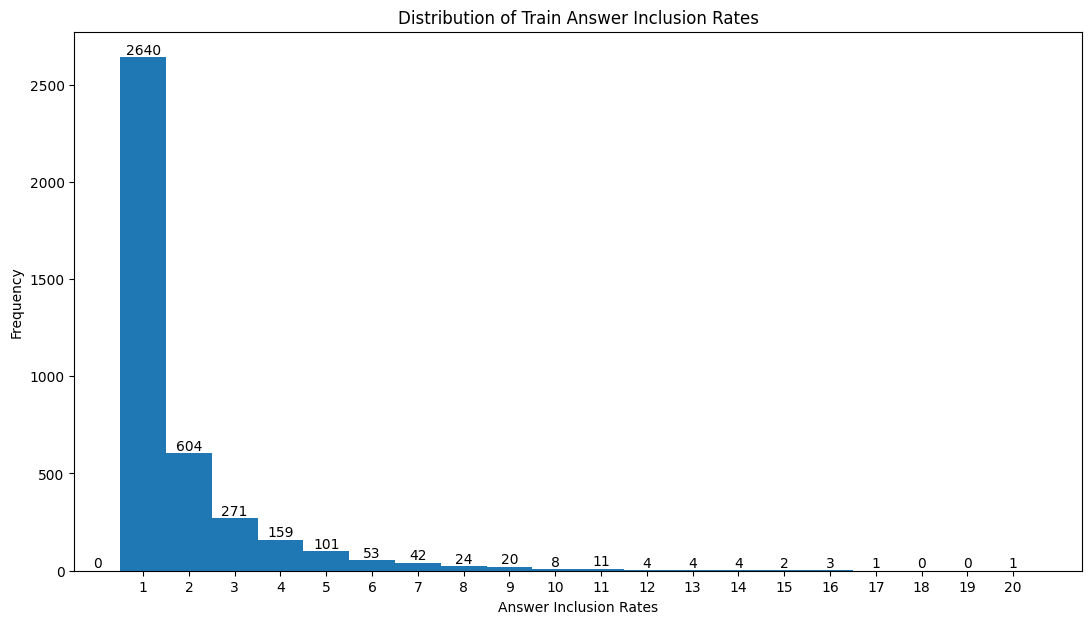

Max Inclusion Rate: 20
Average Inclusion Rate: 1.8365
Min Inclusion Rate: 1


In [43]:
plot_answer_inclusion_hist(train_df, data_name='train')

100%|██████████| 240/240 [00:00<00:00, 379288.98it/s]


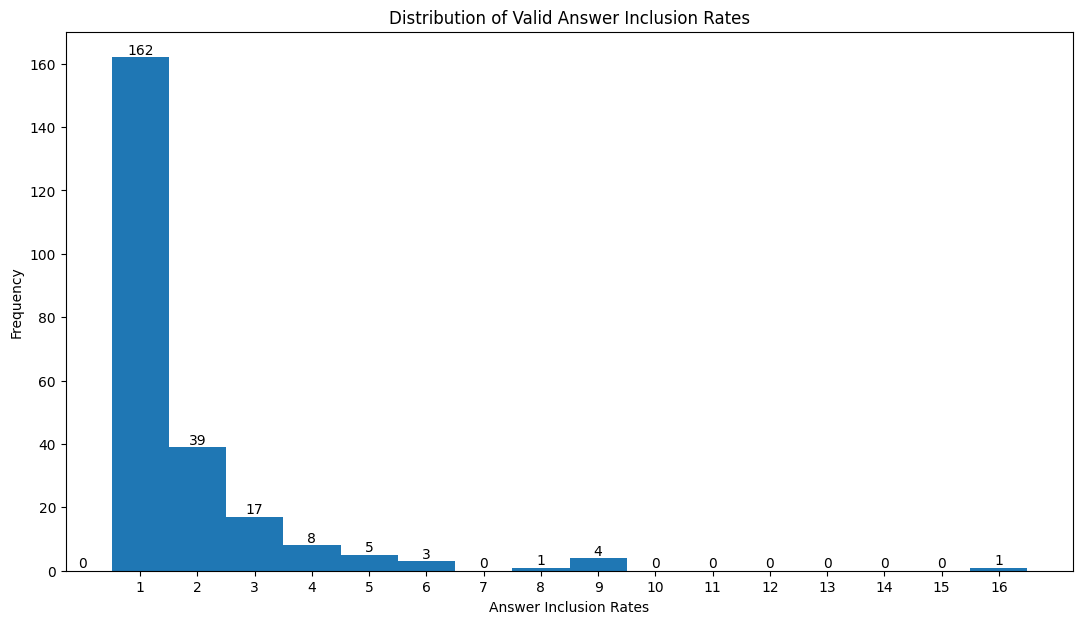

Max Inclusion Rate: 16
Average Inclusion Rate: 1.7750
Min Inclusion Rate: 1


In [45]:
plot_answer_inclusion_hist(valid_df, data_name='valid')